In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt
import simulation
import util
import importlib

importlib.reload(simulation)
importlib.reload(util)


In [315]:
speed_limit = 25                # mph
green_time = 30                 # s
yellow_time_multiple = 0.1      # s/mph
car_length = 16                 # ft
acceleration = 2                # m/s^2

# stopped_car_spacing = 8         # ft
# go_threshold = 20               # ft
# throughput_basic(mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, ft_to_m(car_length), ft_to_m(stopped_car_spacing), ft_to_m(go_threshold), acceleration)

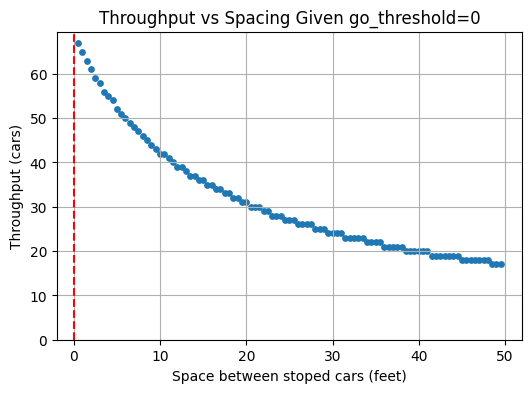

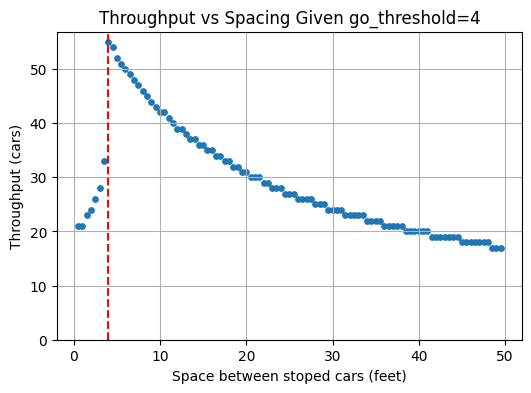

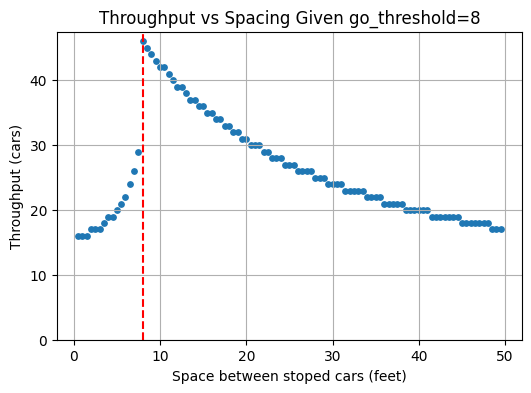

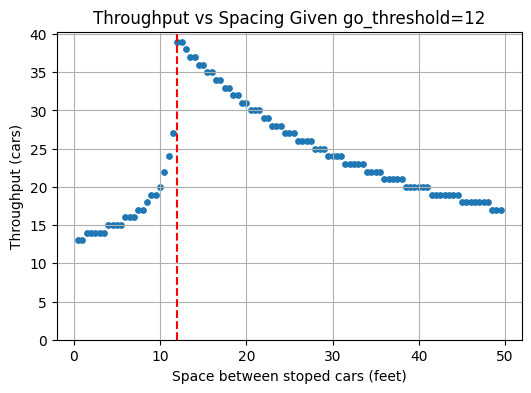

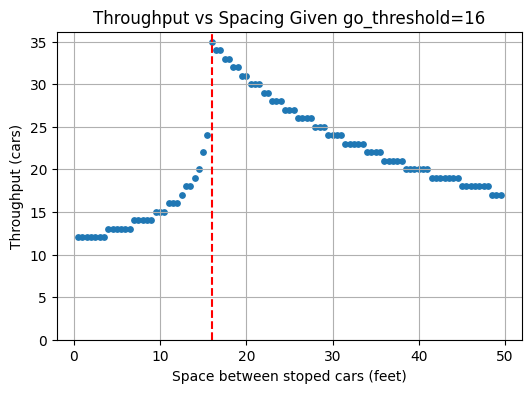

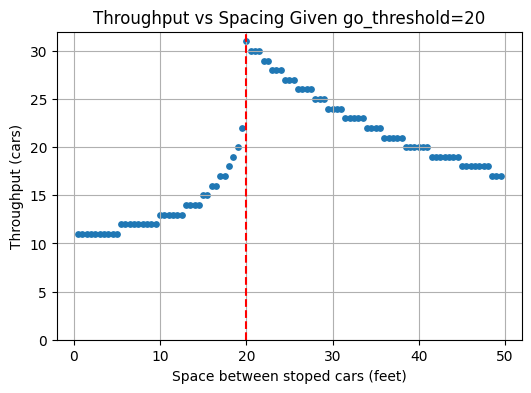

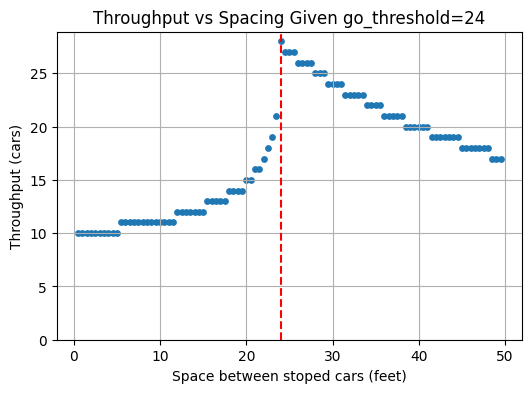

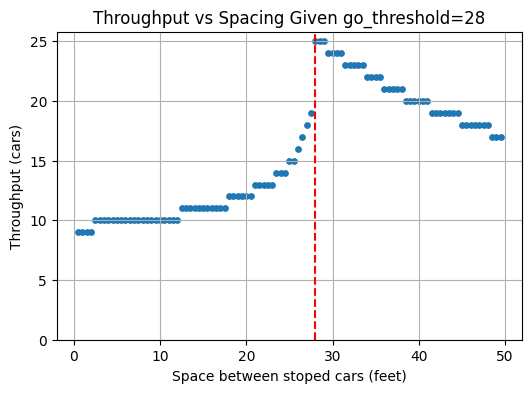

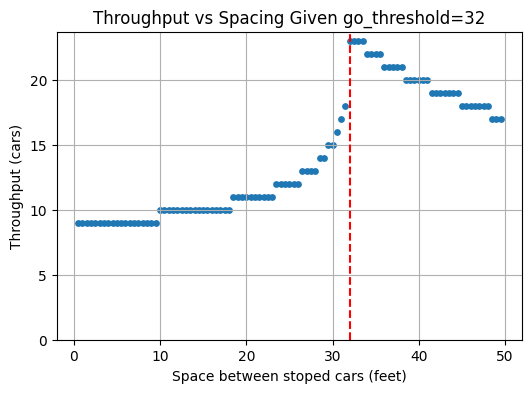

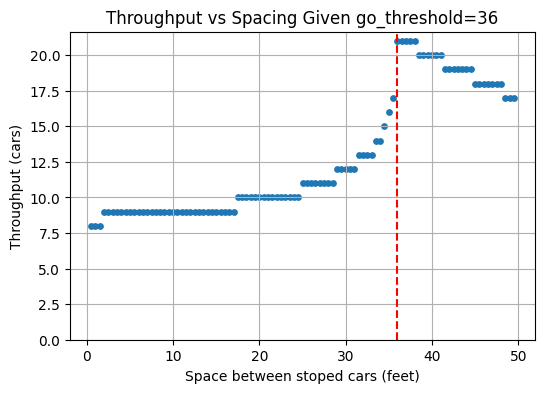

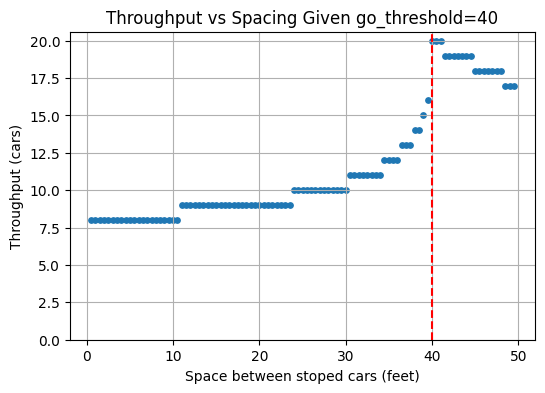

In [316]:
partial_throughput = lambda go_thresh, spacing: simulation.throughput_basic(util.mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, util.ft_to_m(car_length), util.ft_to_m(spacing), util.ft_to_m(go_thresh), acceleration)

go_thresholds = range(0, 41, 4)
stopped_spacings = [x / 2 for x in range(1, 100)]

for thresh in go_thresholds:
    spacing_throughput = lambda space : partial_throughput (thresh, space)
    throughput = list(map(spacing_throughput, stopped_spacings))

    plt.figure(figsize=(6, 4))
    plt.scatter(stopped_spacings, throughput, s=15)
    plt.axvline(x=thresh, color='red', linestyle='--', label='go threshold')

    plt.ylim(bottom=0)

    plt.xlabel("Space between stoped cars (feet)")
    plt.ylabel("Throughput (cars)")
    plt.title(f'Throughput vs Spacing Given go_threshold={thresh}')
    plt.grid(True)
    plt.show()
